In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [3]:
import urllib.request

url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
filename = 'car_fuel_efficiency.csv'

print("Downloading dataset...")
urllib.request.urlretrieve(url, filename)
print("Dataset downloaded successfully!")

df = pd.read_csv(filename)
print(f"Dataset shape: {df.shape}")
print(df.info())
print(df.head())

Dataset downloaded successfully!
Dataset shape: (9704, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB
None
   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       15

In [4]:
# Filter dataset to keep only required columns
required_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_filtered = df[required_columns].copy()

print(f"Filtered dataset shape: {df_filtered.shape}")

Filtered dataset shape: (9704, 5)


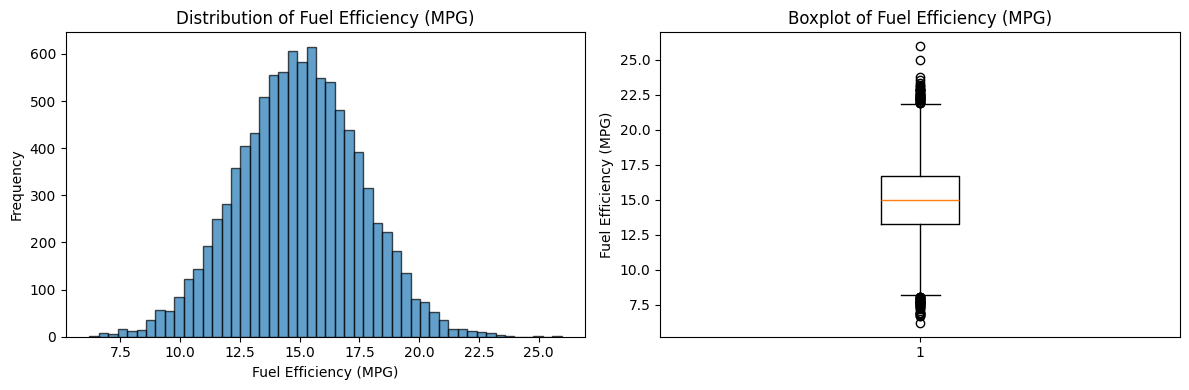

Fuel Efficiency MPG Statistics:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

Skewness: -0.0121
Kurtosis: 0.0227

The fuel_efficiency_mpg variable does not have a long tail (skewness: -0.0121)


In [5]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_filtered['fuel_efficiency_mpg'], bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['fuel_efficiency_mpg'])
plt.title('Boxplot of Fuel Efficiency (MPG)')
plt.ylabel('Fuel Efficiency (MPG)')

plt.tight_layout()
plt.show()

# Statistics for fuel_efficiency_mpg
print("Fuel Efficiency MPG Statistics:")
print(df_filtered['fuel_efficiency_mpg'].describe())
print(f"\nSkewness: {df_filtered['fuel_efficiency_mpg'].skew():.4f}")
print(f"Kurtosis: {df_filtered['fuel_efficiency_mpg'].kurtosis():.4f}")

# Check if it has a long tail
skewness = df_filtered['fuel_efficiency_mpg'].skew()
if skewness > 1:
    print(f"\nThe fuel_efficiency_mpg variable has a long right tail (skewness: {skewness:.4f})")
elif skewness < -1:
    print(f"\nThe fuel_efficiency_mpg variable has a long left tail (skewness: {skewness:.4f})")
else:
    print(f"\nThe fuel_efficiency_mpg variable does not have a long tail (skewness: {skewness:.4f})")

In [6]:
# Question 1: Find column with missing values
print("=== QUESTION 1 ===")
missing_values = df_filtered.isnull().sum()
print(missing_values)

columns_with_missing = missing_values[missing_values > 0]
if len(columns_with_missing) > 0:
    print(f"\nColumn with missing values: {columns_with_missing.index[0]}")
    print(f"Number of missing values: {columns_with_missing.iloc[0]}")
else:
    print("\nNo missing values found.")

# Question 2: Median of horsepower
print("=== QUESTION 2 ===")
median_horsepower = df_filtered['horsepower'].median()
print(f"Median (50% percentile) for 'horsepower': {median_horsepower}")

=== QUESTION 1 ===
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Column with missing values: horsepower
Number of missing values: 708
=== QUESTION 2 ===
Median (50% percentile) for 'horsepower': 149.0


In [7]:
# Prepare and split the dataset
print("=== DATASET PREPARATION ===")

# Shuffle the dataset with seed 42
np.random.seed(42)
df_shuffled = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Dataset shape after shuffling: {df_shuffled.shape}")

# Split into features and target
X = df_shuffled.drop('fuel_efficiency_mpg', axis=1)
y = df_shuffled['fuel_efficiency_mpg']

# Split into train/val/test (60%/20%/20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42  # 0.25 * 0.8 = 0.2
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(df_shuffled)*100:.1f}%)")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/len(df_shuffled)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(df_shuffled)*100:.1f}%)")

=== DATASET PREPARATION ===
Dataset shape after shuffling: (9704, 5)
Training set size: 5822 (60.0%)
Validation set size: 1941 (20.0%)
Test set size: 1941 (20.0%)


In [8]:
# Question 3: Compare filling missing values with 0 vs mean
print("=== QUESTION 3 ===")

# Calculate mean of horsepower from training set only
horsepower_mean = X_train['horsepower'].mean()
print(f"Mean horsepower from training set: {horsepower_mean:.2f}")

# Option 1: Fill with 0
X_train_fill_0 = X_train.copy()
X_val_fill_0 = X_val.copy()
X_train_fill_0['horsepower'] = X_train_fill_0['horsepower'].fillna(0)
X_val_fill_0['horsepower'] = X_val_fill_0['horsepower'].fillna(0)

# Option 2: Fill with mean
X_train_fill_mean = X_train.copy()
X_val_fill_mean = X_val.copy()
X_train_fill_mean['horsepower'] = X_train_fill_mean['horsepower'].fillna(horsepower_mean)
X_val_fill_mean['horsepower'] = X_val_fill_mean['horsepower'].fillna(horsepower_mean)

# Train models and evaluate
def train_and_evaluate(X_train_data, X_val_data, y_train_data, y_val_data, option_name):
    model = LinearRegression()
    model.fit(X_train_data, y_train_data)
    
    y_val_pred = model.predict(X_val_data)
    rmse = np.sqrt(mean_squared_error(y_val_data, y_val_pred))
    
    print(f"{option_name}: RMSE = {round(rmse, 2)}")
    return rmse

# Train and evaluate both options
rmse_fill_0 = train_and_evaluate(X_train_fill_0, X_val_fill_0, y_train, y_val, "Fill with 0")
rmse_fill_mean = train_and_evaluate(X_train_fill_mean, X_val_fill_mean, y_train, y_val, "Fill with mean")

# Determine which is better
if rmse_fill_0 < rmse_fill_mean:
    print(f"\nBetter option: Fill with 0 (RMSE: {round(rmse_fill_0, 2)})")
elif rmse_fill_mean < rmse_fill_0:
    print(f"\nBetter option: Fill with mean (RMSE: {round(rmse_fill_mean, 2)})")
else:
    print(f"\nBoth options are equally good (RMSE: {round(rmse_fill_0, 2)})")

=== QUESTION 3 ===
Mean horsepower from training set: 149.21
Fill with 0: RMSE = 0.53
Fill with mean: RMSE = 0.47

Better option: Fill with mean (RMSE: 0.47)


In [9]:
# Question 4: Train regularized linear regression with different r values
print("=== QUESTION 4 ===")

# Fill missing values with 0 as specified
X_train_q4 = X_train.copy()
X_val_q4 = X_val.copy()
X_train_q4['horsepower'] = X_train_q4['horsepower'].fillna(0)
X_val_q4['horsepower'] = X_val_q4['horsepower'].fillna(0)

# Test different r values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_results = {}

print("Testing different regularization values:")
for r in r_values:
    if r == 0:
        # Use LinearRegression for r=0 (no regularization)
        model = LinearRegression()
    else:
        # Use Ridge regression for r > 0
        model = Ridge(alpha=r)
    
    model.fit(X_train_q4, y_train)
    y_val_pred = model.predict(X_val_q4)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_results[r] = round(rmse, 2)
    
    print(f"r = {r}: RMSE = {rmse_results[r]}")

# Find the best r value (smallest RMSE, and if tied, smallest r)
best_rmse = min(rmse_results.values())
best_r_values = [r for r, rmse in rmse_results.items() if rmse == best_rmse]
best_r = min(best_r_values)  # Select smallest r in case of tie

print(f"\nBest r value: {best_r} (RMSE: {best_rmse})")

=== QUESTION 4 ===
Testing different regularization values:
r = 0: RMSE = 0.53
r = 0.01: RMSE = 0.53
r = 0.1: RMSE = 0.53
r = 1: RMSE = 0.53
r = 5: RMSE = 0.53
r = 10: RMSE = 0.53
r = 100: RMSE = 0.53

Best r value: 0 (RMSE: 0.53)


In [10]:
# Question 5: Test different seeds and calculate standard deviation
print("=== QUESTION 5 ===")

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

print("Testing different seeds:")
for seed in seeds:
    # Split data with the current seed
    X_train_full_seed, X_test_seed, y_train_full_seed, y_test_seed = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    
    X_train_seed, X_val_seed, y_train_seed, y_val_seed = train_test_split(
        X_train_full_seed, y_train_full_seed, test_size=0.25, random_state=seed
    )
    
    # Fill missing values with 0
    X_train_seed_filled = X_train_seed.copy()
    X_val_seed_filled = X_val_seed.copy()
    X_train_seed_filled['horsepower'] = X_train_seed_filled['horsepower'].fillna(0)
    X_val_seed_filled['horsepower'] = X_val_seed_filled['horsepower'].fillna(0)
    
    # Train model without regularization
    model = LinearRegression()
    model.fit(X_train_seed_filled, y_train_seed)
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_val_seed_filled)
    rmse = np.sqrt(mean_squared_error(y_val_seed, y_val_pred))
    rmse_scores.append(rmse)
    
    print(f"Seed {seed}: RMSE = {rmse:.6f}")

# Calculate standard deviation
std_rmse = np.std(rmse_scores)
print(f"\nRMSE scores: {[round(score, 6) for score in rmse_scores]}")
print(f"Standard deviation: {round(std_rmse, 3)}")

=== QUESTION 5 ===
Testing different seeds:
Seed 0: RMSE = 0.525408
Seed 1: RMSE = 0.513914
Seed 2: RMSE = 0.498802
Seed 3: RMSE = 0.530397
Seed 4: RMSE = 0.508543
Seed 5: RMSE = 0.523740
Seed 6: RMSE = 0.517541
Seed 7: RMSE = 0.526446
Seed 8: RMSE = 0.521765
Seed 9: RMSE = 0.517608

RMSE scores: [np.float64(0.525408), np.float64(0.513914), np.float64(0.498802), np.float64(0.530397), np.float64(0.508543), np.float64(0.52374), np.float64(0.517541), np.float64(0.526446), np.float64(0.521765), np.float64(0.517608)]
Standard deviation: 0.009


In [11]:
# Question 6: Use seed 9, combine train+val, train with r=0.001
print("=== QUESTION 6 ===")

# Split dataset with seed 9
X_train_full_q6, X_test_q6, y_train_full_q6, y_test_q6 = train_test_split(
    X, y, test_size=0.2, random_state=9
)

X_train_q6, X_val_q6, y_train_q6, y_val_q6 = train_test_split(
    X_train_full_q6, y_train_full_q6, test_size=0.25, random_state=9
)

# Combine train and validation datasets
X_train_combined = pd.concat([X_train_q6, X_val_q6], axis=0)
y_train_combined = pd.concat([y_train_q6, y_val_q6], axis=0)

print(f"Combined training set size: {X_train_combined.shape[0]}")
print(f"Test set size: {X_test_q6.shape[0]}")

# Fill missing values with 0
X_train_combined_filled = X_train_combined.copy()
X_test_q6_filled = X_test_q6.copy()
X_train_combined_filled['horsepower'] = X_train_combined_filled['horsepower'].fillna(0)
X_test_q6_filled['horsepower'] = X_test_q6_filled['horsepower'].fillna(0)

# Train model with r=0.001
model = Ridge(alpha=0.001)
model.fit(X_train_combined_filled, y_train_combined)

# Evaluate on test set
y_test_pred = model.predict(X_test_q6_filled)
rmse_test = np.sqrt(mean_squared_error(y_test_q6, y_test_pred))

print(f"\nRMSE on test dataset: {rmse_test:.6f}")
print(f"Rounded RMSE: {round(rmse_test, 3)}")

=== QUESTION 6 ===
Combined training set size: 7763
Test set size: 1941

RMSE on test dataset: 0.524166
Rounded RMSE: 0.524
